In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import long_tail_barchart, load_behance_features
%aimport utils

In [3]:
DATASET_PATH = '/mnt/workspace/Behance/'

In [4]:
!ls /mnt/workspace/Behance/

Behance_appreciate_1M  Behance_Image_Features.b  Behance_Item_to_Owners


### Behance_appreciate_1M

In [5]:
df_appreciate = pd.read_csv(DATASET_PATH + 'Behance_appreciate_1M', sep=" ",
                            header=None, names=['user', 'item', 'timestamp'])

In [6]:
len(df_appreciate)

1000000

In [7]:
n_users = df_appreciate.user.nunique()
n_items = df_appreciate.item.nunique()
n_users, n_items

(63497, 178788)

In [8]:
items_set = set(df_appreciate.item)

In [39]:
likes_per_user = df_appreciate.groupby('user').item.count().values
print ('min = ', likes_per_user.min())
print ('max = ', likes_per_user.max())
print ('mean = ', likes_per_user.mean())

min =  1
max =  2260
mean =  15.748775532702332


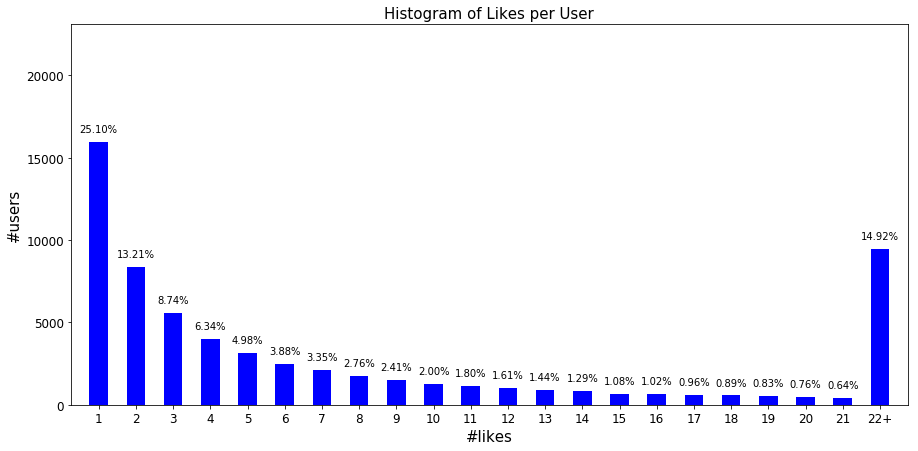

In [38]:
long_tail_barchart(likes_per_user, 0.85, '#likes', '#users', 'Histogram of Likes per User', figsize=(15,7),
                   fontsize_col_text=10)
plt.show()

In [40]:
likes_per_item = df_appreciate.groupby('item').user.count().values
print ('min = ', likes_per_item.min())
print ('max = ', likes_per_item.max())
print ('mean = ', likes_per_item.mean())

min =  1
max =  1793
mean =  5.593216546971832


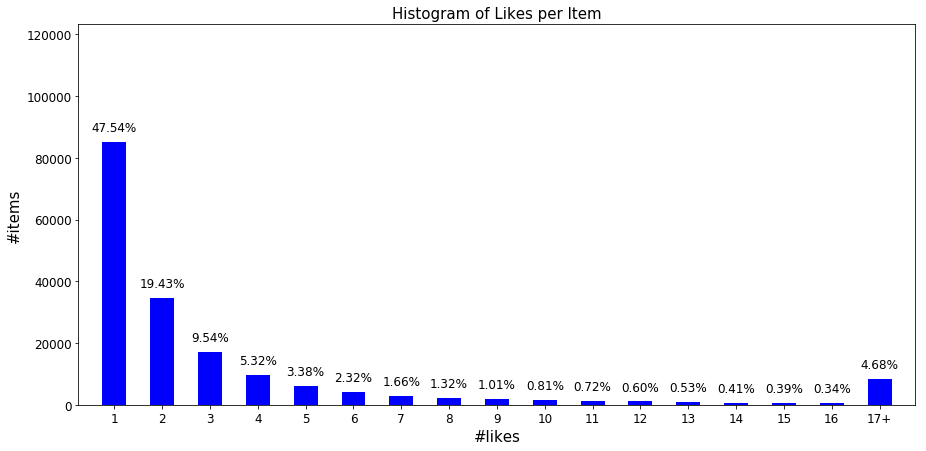

In [43]:
long_tail_barchart(likes_per_item, 0.95, '#likes', '#items', 'Histogram of Likes per Item', figsize=(15,7),
                   fontsize_col_text=12)
plt.show()

### Behance_Item_to_Owners

In [13]:
df_item2owner = pd.read_csv(DATASET_PATH + 'Behance_Item_to_Owners', sep=" ",
                            header=None, names=['item', 'owner'])

In [14]:
assert len(items_set) == df_item2owner.item.nunique()

In [15]:
assert all(i in items_set for i in df_item2owner.item)

In [16]:
items_per_owner = df_item2owner.groupby('owner').item.count().values

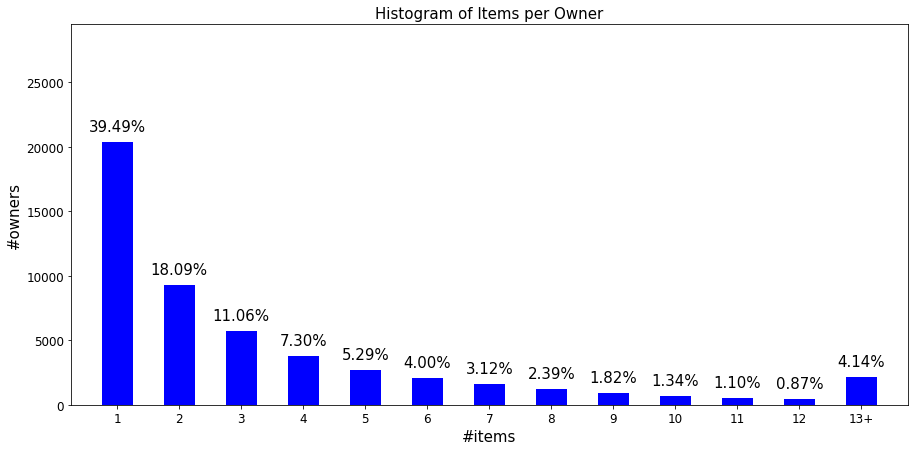

In [17]:
long_tail_barchart(items_per_owner, 0.95, '#items', '#owners', 'Histogram of Items per Owner', figsize=(15,7),
                   fontsize_col_text=15)
plt.show()

In [18]:
owners_per_item = df_item2owner.groupby('item').owner.count().values

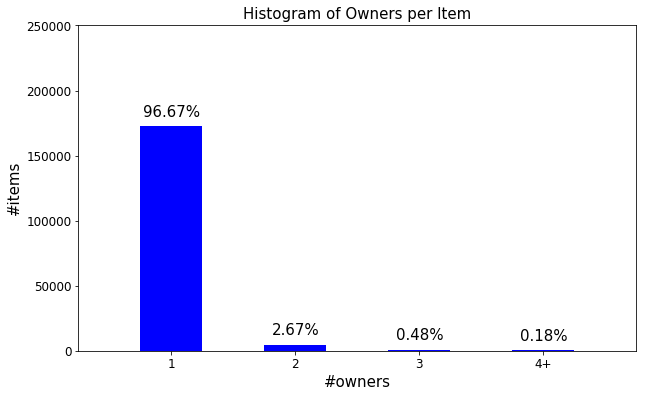

In [19]:
long_tail_barchart(owners_per_item, 0.995, '#owners', '#items', 'Histogram of Owners per Item', figsize=(10,6),
                   fontsize_col_text=15)
plt.show()

##### Owners per User

In [49]:
from utils import pairs2dict

In [50]:
user2likedItems = pairs2dict(df_appreciate.values[:,:2])

In [55]:
item2owners = pairs2dict(df_item2owner.values)

In [56]:
user2owners = dict()
for u, items in user2likedItems.items():
    owners = set()
    for i in items:
        owners.update(item2owners[i])
    user2owners[u] = owners

In [59]:
owners_per_user = [len(x) for x in user2owners.values()]

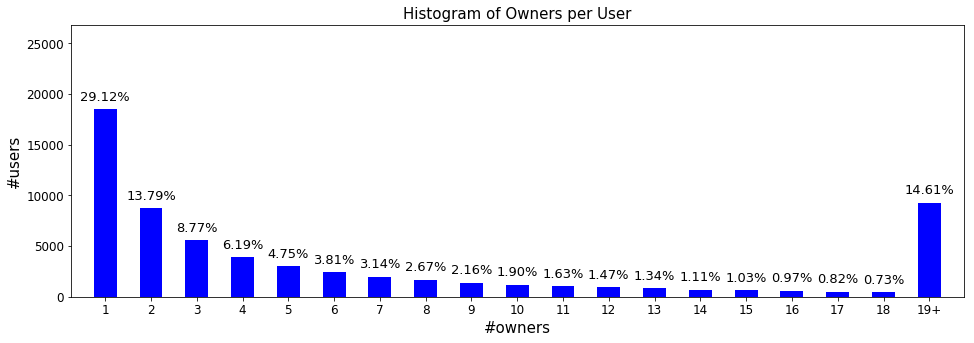

In [65]:
long_tail_barchart(owners_per_user, 0.85, '#owners', '#users', 'Histogram of Owners per User', figsize=(16,5),
                   fontsize_col_text=13)
plt.show()

### Behance_Image_Features.b 

In [20]:
tmp = load_behance_features(DATASET_PATH + 'Behance_Image_Features.b')

bytes: 2930692096
n_items: 178787


In [34]:
tmp['featmat'].shape

(178787, 4096)

In [35]:
tmp['featmat'].mean(),\
tmp['featmat'].min(),\
tmp['featmat'].max()

(0.45720737802521, 0.0, 37.491825103759766)

In [32]:
assert all(i in items_set for i in tmp['ids'])
assert len(tmp['ids']) == len(tmp['id2index'])